# Online Retail Project in Python

To identify the customers, purchase pattern by using past record of customer 
shopping so that firm can make effective strategy for different types of customers by 
using customer purchase pattern data.

Customer segmentation is the process of separating customers into groups on the basis of their 
shared behaviour or other attributes. The groups should be homogeneous within themselves and 
should also be heterogeneous to each other.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading the dataset csv file
data = pd.read_csv('OnlineRetail.csv',encoding='latin1')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

In [5]:
#viewing all the column names
data.keys()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
data = data.dropna()
data.shape

(406829, 8)

In [9]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [11]:
#viewing some basic details of dataset
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data pre-processing

In [12]:
# #removing the redundancy
data = data.loc[data["UnitPrice"] > 0] 

In [13]:
data.shape

(406789, 8)

In [14]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406789.000000,406789.000000,406789.000000
mean,12.028359,3.460811,15287.795830
std,247.927842,69.318561,1713.573064
min,-80995.000000,0.001000,12346.000000
25%,2.000000,1.250000,13954.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
#we have to convert this into datetime for calculating all the values.
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [16]:
#getting all the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406789 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406789 non-null  object        
 1   StockCode    406789 non-null  object        
 2   Description  406789 non-null  object        
 3   Quantity     406789 non-null  int64         
 4   InvoiceDate  406789 non-null  datetime64[ns]
 5   UnitPrice    406789 non-null  float64       
 6   CustomerID   406789 non-null  float64       
 7   Country      406789 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


# from here we now calculate our Monetary Value

In [17]:
#calculating our monetary value
data["Sale"] =data.Quantity * data.UnitPrice 

In [18]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [19]:
#Here we are getting our monetary value by grouping customer with their customer id and total no. of sales.
monetary =data.groupby("CustomerID").Sale.sum()
monetary

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Sale, Length: 4371, dtype: float64

In [20]:
#resetting our index,our monetary has multiindex so we are removing it
monetary = monetary.reset_index() 

In [21]:
monetary.head()

,CustomerID,Sale
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


# RFM analysis is a marketing technique used to quantitatively rank and group customers based 
on the recency, frequency and monetary total of their recent transactions to identify the best 
customers and perform targeted marketing campaigns. The system assigns each customer 
numerical scores based on these factors to provide an objective analysis. RFM analysis ranks each 
customer on the following factors:
    
• Recency. How recent was the customer's last purchase? Customers who recently made a 
purchase will still have the product on their mind and are more likely to purchase or use 
the product again. Businesses often measure recency in days. But, depending on the 
product, they may measure it in years, weeks or even hours.

• Frequency. How often did this customer make a purchase in a given period? Customers 
who purchased once are often are more likely to purchase again. Additionally, first time 
customers may be good targets for follow-up advertising to convert them into more 
frequent customers.

• Monetary. How much money did the customer spend in a given period? Customers who 
spend a lot of money are more likely to spend money in the future and have a high value to 
a business

# Now we will calculate frequency of our dataset

#calculating our frequency

In [22]:
#for calculating frequency here we also using groupby function grouping CustomerId along with the count of Their invoice no. we can get our frequency
frequency=data.groupby("CustomerID").InvoiceNo.count()

In [23]:
#resetting our index,our frequency has multiindex so we are removing it
frequency = frequency.reset_index()

In [24]:
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


# Now we will calculate our recency value

#calculating our recency value
#customers' recency = how long ago they made a purchase

In [25]:
#calculating the last date of InvoiceDate
LastDate=max(data.InvoiceDate)

In [26]:
LastDate

Timestamp('2011-12-09 12:50:00')

In [27]:
#adding one to LastDate
LastDate = LastDate + pd.DateOffset(days=1)

In [28]:
LastDate

Timestamp('2011-12-10 12:50:00')

In [29]:
#Diff is the difference between our Lastate and InvoiceData
data["Diff"] = LastDate - data.InvoiceDate

In [30]:
recency = data.groupby("CustomerID").Diff.min()
recency 

CustomerID
12346.0   326 days 02:33:00
12347.0     2 days 20:58:00
12348.0    75 days 23:37:00
12349.0    19 days 02:59:00
12350.0   310 days 20:49:00
                 ...       
18280.0   278 days 02:58:00
18281.0   181 days 01:57:00
18282.0     8 days 01:07:00
18283.0     4 days 00:48:00
18287.0    43 days 03:21:00
Name: Diff, Length: 4371, dtype: timedelta64[ns]

In [31]:
recency = recency.reset_index()

In [32]:
recency.head()

,CustomerID,Diff
0,12346.0,326 days 02:33:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00


# Now we create a combined data frame

#comnining all dataframes into one

In [33]:
rmf = monetary.merge(frequency, on = "CustomerID")

In [34]:
rmf = rmf.merge(recency, on = "CustomerID")

In [35]:
rmf.columns = ["CustomerID", "Monetary", "Frequence", "Recency"]

In [36]:
rmf

,CustomerID,Monetary,Frequence,Recency
0,12346.0,0.00,2,326 days 02:33:00
1,12347.0,4310.00,182,2 days 20:58:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00
...,...,...,...,...
4366,18280.0,180.60,10,278 days 02:58:00
4367,18281.0,80.82,7,181 days 01:57:00
4368,18282.0,176.60,13,8 days 01:07:00
4369,18283.0,2094.88,756,4 days 00:48:00


#dropping customer id and storing it into RMF1

In [37]:
RMF1 = rmf.drop("CustomerID",axis =1) 
RMF1.Recency = RMF1.Recency.dt.days
RMF1

,Monetary,Frequence,Recency
0,0.00,2,326
1,4310.00,182,2
2,1797.24,31,75
3,1757.55,73,19
4,334.40,17,310
...,...,...,...
4366,180.60,10,278
4367,80.82,7,181
4368,176.60,13,8
4369,2094.88,756,4


In [38]:
from sklearn.cluster import KMeans

In [39]:
ssd = []
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km.fit(RMF1)
    ssd.append(km.inertia_)

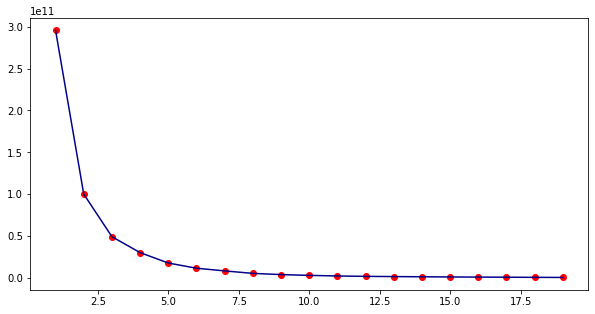

In [40]:
plt.figure(figsize = (10,5))
plt.plot(np.arange(1,20), ssd,color="darkblue")
plt.scatter(np.arange(1,20), ssd,color="red")
plt.show()

In [41]:
model = KMeans(n_clusters = 5)
clusterID = model.fit_predict(RMF1)

In [42]:
clusterID

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
RMF1['clusterID'] = clusterID 

In [44]:
RMF1

,Monetary,Frequence,Recency,clusterID
0,0.00,2,326,0
1,4310.00,182,2,0
2,1797.24,31,75,0
3,1757.55,73,19,0
4,334.40,17,310,0
...,...,...,...,...
4366,180.60,10,278,0
4367,80.82,7,181,0
4368,176.60,13,8,0
4369,2094.88,756,4,0


In [45]:
# Now our Data Visualization part starts

km_cluster_sale =RMF1.groupby("clusterID").Monetary.mean()

km_cluster_Recency =RMF1.groupby("clusterID").Recency.mean()

km_cluster_Frequence =RMF1.groupby("clusterID").Frequence.mean()

In [46]:
 km_cluster_sale

clusterID
0       947.803931
1    129057.952000
2     40928.794815
3    267963.755000
4      8102.486015
Name: Monetary, dtype: float64

[]

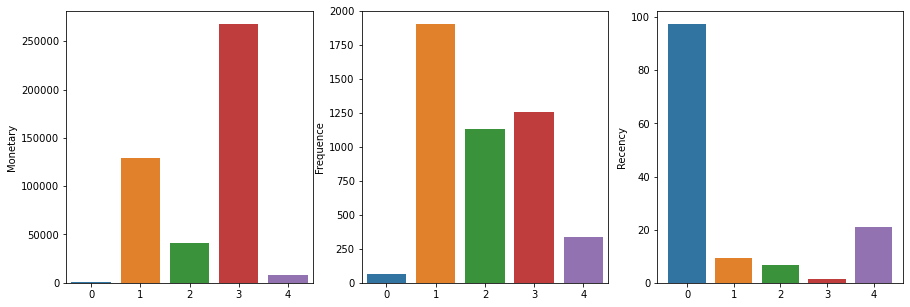

In [47]:
fig, axs = plt.subplots(1,3, figsize = (15, 5))

sns.barplot(x = [0,1,2,3,4],  y = km_cluster_sale , ax = axs[0])

sns.barplot(x = [0,1,2,3,4],  y = km_cluster_Frequence , ax = axs[1])

sns.barplot(x = [0,1,2,3,4],  y = km_cluster_Recency , ax = axs[2])
plt.plot()

K means clustering is one of the most popular clustering algorithms and usually the first thing 
practitioners apply when solving clustering tasks to get an idea of the structure of the dataset. The 
goal of K means is to group data points into distinct non-overlapping subgroups. One of the major 
applications of K means clustering is segmentation of customers to get a better understanding of 
them which in turn could be used to increase the revenue of the company.

Below are some inferences from the project 

1) Customers have been segmented in 5 Cluster/groups namely (0, 1, 2, 3, 4).

2) Customers whose Monetary value & Frequency is least and Recency is highest has been
segmented in group 0. 

3) Customers whose Monetary value is highest, Frequency ~ 1000 & Recency is least has been
segmented in group 1. 

4) Customers whose Monetary value ~ 110000 $, Frequency ~ 2400 & Recency ~ 8 days has been
segmented in group 2. 


5) Customers whose Monetary value ~ 10000 $, Frequency ~ 350 & Recency ~ 20 days has been
segmented in group 3. 

6) Customers whose Monetary value ~ 40000 $, Frequency ~ 1100 & Recency ~ 5 days has been
segmented in group 4. 

7) Based on this segmentation it is clear that organization will make different strategy for all 
segments and will focus on different segments of customer based on below order of priority to 
increase the revenue.

Group 1 -> Group 2 -> Group 4 -> Group 3 -> Group 1